In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import csv

# 2019 vs. 2020

In [2]:
df19=pd.read_csv('2019년 전 기간 대여소 정리.csv')
df20=pd.read_csv('2020년 전 기간 대여소 정리.csv')

In [3]:
df19.head(10)

,Unnamed: 0,station,보관소(대여소)명,자치구,위도,경도,N_out,N_in,Count,Flow,degree_centrality,pagerank
0,234,502,뚝섬유원지역 1번출구 앞,광진구,37.531860,127.067192,97677,112234,209911,0.069348,0.708067,0.001570
1,1004,207,여의나루역 1번출구 앞,영등포구,37.526989,126.932098,97674,97016,194690,-0.003380,0.811780,0.001793
2,681,113,홍대입구역 2번출구 앞,마포구,37.557499,126.923805,69009,83260,152269,0.093591,0.565301,0.001261
3,1370,1210,롯데월드타워(잠실역2번출구 쪽),송파구,37.513126,127.100960,66900,69709,136609,0.020562,0.482714,0.001080
4,1126,2102,봉림교 교통섬,관악구,37.484230,126.926392,59583,60153,119736,0.004760,0.419974,0.000955
5,1188,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,37.506199,127.003944,59095,60320,119415,0.010258,0.848271,0.001868
6,704,152,마포구민체육센터 앞,마포구,37.556610,126.898018,52354,60851,113205,0.075059,0.557618,0.001241
7,371,1308,안암로터리 버스정류장 앞,성북구,37.582592,127.028976,52527,58790,111317,0.056263,0.488476,0.001084
8,225,3533,건대입구역 사거리(롯데백화점),광진구,37.539139,127.070618,56561,53711,110272,-0.025845,0.565941,0.001264
9,886,2701,마곡나루역 5번출구 뒤편,강서구,37.565201,126.827316,53290,48947,102237,-0.042480,0.272087,0.000641


In [4]:
df20.head(10)

,Unnamed: 0,station,보관소(대여소)명,자치구,위도,경도,N_out,N_in,Count,Flow,degree_centrality,pagerank
0,324,502,뚝섬유원지역 1번출구 앞,광진구,37.531860,127.067192,108939,121725,230664,0.055431,0.668831,0.001421
1,1365,207,여의나루역 1번출구 앞,영등포구,37.526989,126.932098,104436,107445,211881,0.014201,0.749072,0.001586
2,953,152,마포구민체육센터 앞,마포구,37.556610,126.898018,67672,74646,142318,0.049003,0.531540,0.001131
3,1526,2102,봉림교 교통섬,관악구,37.484230,126.926392,67980,68585,136565,0.004430,0.380798,0.000833
4,1604,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,37.506199,127.003944,55464,58723,114187,0.028541,0.752319,0.001590
5,1138,1153,"발산역 1번, 9번 인근 대여소",강서구,37.558910,126.838097,51557,51836,103393,0.002698,0.266234,0.000589
6,1835,1210,롯데월드타워(잠실역2번출구 쪽),송파구,37.513126,127.100960,51250,51621,102871,0.003606,0.430427,0.000922
7,273,583,청계천 생태교실 앞,성동구,37.567970,127.046890,50643,51928,102571,0.012528,0.660482,0.001401
8,1424,272,당산육갑문,영등포구,37.535339,126.903679,49746,52433,102179,0.026297,0.607143,0.001290
9,1180,2701,마곡나루역 5번출구 뒤편,강서구,37.565201,126.827316,50135,49913,100048,-0.002219,0.249536,0.000555


Text(0.5, 1.0, '2019')

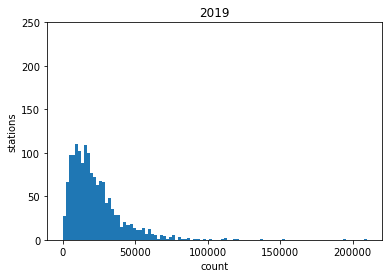

In [5]:
%matplotlib inline
h = plt.hist(df19['Count'], 100)
plt.xlabel("count")
plt.ylabel("stations")
plt.ylim(0,250)
plt.title("2019")

In [6]:
df19.describe()

,Unnamed: 0,station,위도,경도,N_out,N_in,Count,Flow,degree_centrality,pagerank
count,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000,1516.000000
mean,757.500000,1298.900396,37.547194,126.990470,11250.102902,11251.664908,22501.767810,-0.029437,0.276242,0.000645
std,437.775818,816.287100,0.051709,0.088622,8962.436026,9597.617606,18501.574896,0.109309,0.120396,0.000251
min,0.000000,101.000000,37.437271,126.798599,6.000000,3.000000,9.000000,-0.688635,0.005122,0.000082
25%,378.750000,578.750000,37.505410,126.916836,5332.000000,4874.750000,10123.750000,-0.048865,0.187420,0.000457
50%,757.500000,1226.500000,37.546589,127.002792,9006.000000,8880.000000,17809.000000,-0.002180,0.264725,0.000620
75%,1136.250000,1959.250000,37.577710,127.059313,14388.750000,14690.500000,29013.250000,0.025916,0.347951,0.000795
max,1515.000000,3543.000000,37.689720,127.180267,97677.000000,112234.000000,209911.000000,0.193747,0.848271,0.001868


Text(0.5, 1.0, '2020')

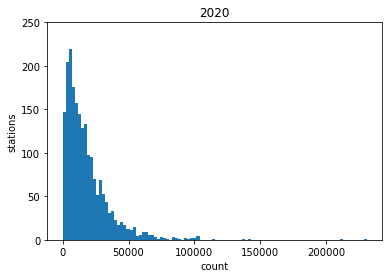

In [7]:
%matplotlib inline
h = plt.hist(df20['Count'], 100)
plt.xlabel("count")
plt.ylabel("stations")
plt.ylim(0,250)
plt.title("2020")

In [8]:
df20.describe()

,Unnamed: 0,station,위도,경도,N_out,N_in,Count,Flow,degree_centrality,pagerank
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1019.500000,1500.653922,37.548062,126.989774,9008.076961,9007.617647,18015.694608,-0.030923,0.213977,0.000480
std,589.041594,930.068797,0.051776,0.088998,8601.122802,9068.737432,17650.152098,0.096637,0.106171,0.000213
min,0.000000,101.000000,37.430977,126.798599,1.000000,1.000000,2.000000,-0.752608,0.000928,0.000049
25%,509.750000,711.750000,37.505788,126.917004,3282.250000,2978.750000,6213.250000,-0.035274,0.137639,0.000327
50%,1019.500000,1380.500000,37.547921,127.001419,6802.500000,6663.500000,13427.000000,-0.002746,0.198516,0.000448
75%,1529.250000,2221.250000,37.577996,127.058155,11947.250000,11979.250000,23903.750000,0.011519,0.271916,0.000594
max,2039.000000,3586.000000,37.689720,127.180267,108939.000000,121725.000000,230664.000000,0.164074,0.752319,0.001590


In [9]:
x=pd.merge(df19,df20, left_on='station', right_on='station', how='inner')

## Count

In [10]:
df_count=x.copy()[['station','보관소(대여소)명_x','자치구_x','Count_x','Count_y']]
df_count

,station,보관소(대여소)명_x,자치구_x,Count_x,Count_y
0,502,뚝섬유원지역 1번출구 앞,광진구,209911,230664
1,207,여의나루역 1번출구 앞,영등포구,194690,211881
2,113,홍대입구역 2번출구 앞,마포구,152269,62322
3,1210,롯데월드타워(잠실역2번출구 쪽),송파구,136609,102871
4,2102,봉림교 교통섬,관악구,119736,136565
...,...,...,...,...,...
1510,664,서울시립대 대학본부,동대문구,758,6086
1511,2287,능안마을입구,서초구,540,325
1512,465,삼청공원 앞,종로구,150,1876
1513,2394,개포래미안포레스트아파트 107동 앞,강남구,62,270


In [11]:
df_count['Net']=df_count['Count_y']-df_count['Count_x']
df_count = df_count.sort_values(by='Net' ,ascending=False)
df_count.head(10)

,station,보관소(대여소)명_x,자치구_x,Count_x,Count_y,Net
464,765,오목교역 3번출구,양천구,26434,66313,39879
31,583,청계천 생태교실 앞,성동구,70773,102571,31798
6,152,마포구민체육센터 앞,마포구,113205,142318,29113
378,1152,마곡역교차로,강서구,29017,55522,26505
207,186,월드컵공원,마포구,39055,63993,24938
917,766,신목동역 3번출구,양천구,14896,39395,24499
97,3511,응봉역 1번출구,성동구,51977,76287,24310
287,1827,독산보도육교 앞 자전거 보관소,금천구,33284,56729,23445
25,2177,신대방역 2번 출구,관악구,75397,98325,22928
20,565,옥수역 3번출구,성동구,76660,99390,22730


In [12]:
df_count.tail(10)

,station,보관소(대여소)명_x,자치구_x,Count_x,Count_y,Net
24,505,자양사거리 광진아크로텔 앞,광진구,75627,55092,-20535
46,421,마포구청 앞,마포구,62871,42302,-20569
11,1222,잠실새내역 5번 출구 뒤,송파구,93630,70266,-23364
7,1308,안암로터리 버스정류장 앞,성북구,111317,84994,-26323
64,358,성대입구 사거리,종로구,58264,29577,-28687
35,1212,송파역 2번 출구앞,송파구,68383,37814,-30569
3,1210,롯데월드타워(잠실역2번출구 쪽),송파구,136609,102871,-33738
61,592,건국대학교 학생회관,광진구,59161,20510,-38651
22,590,건국대학교 (입학정보관),광진구,75918,30279,-45639
2,113,홍대입구역 2번출구 앞,마포구,152269,62322,-89947


## Flow

In [13]:
df19_1=df19[df19['Count']>10000] # 1일 평균 대여량 최소 30건 이상인 곳
df20_1=df20[df20['Count']>10000]
y=pd.merge(df19_1,df20_1, left_on='station', right_on='station', how='inner')

In [14]:
df_flow=y.copy()[['station','보관소(대여소)명_x','자치구_x','Flow_x','Flow_y']]

In [15]:
df_flow['Net']=df_flow['Flow_y']-df_flow['Flow_x']
df_flow = df_flow.sort_values(by='Net' ,ascending=False)
# 반납>>대여
df_flow.head(10)

,station,보관소(대여소)명_x,자치구_x,Flow_x,Flow_y,Net
868,416,상암월드컵파크 1단지 교차로,마포구,-0.395482,-0.259444,0.136037
1002,1006,롯데캐슬 115동앞,강동구,-0.170889,-0.068256,0.102633
954,198,충정2교,서대문구,-0.193437,-0.091293,0.102144
472,3513,상왕십리역 1번출구,성동구,-0.171085,-0.070907,0.100178
981,160,북아현동 가구거리,서대문구,-0.249290,-0.149602,0.099688
1018,2702,마곡 엠밸리2단지,강서구,-0.164527,-0.068463,0.096065
996,195,모래내고가차도,서대문구,-0.112783,-0.023826,0.088958
506,2306,압구정역 2번 출구 옆,강남구,-0.132114,-0.045462,0.086653
49,3541,커먼그라운드,광진구,-0.078430,0.007573,0.086004
308,2013,장승배기역 5번출구,동작구,-0.174104,-0.088465,0.085639


In [16]:
# 대여>>반납
df_flow.tail(10)

,station,보관소(대여소)명_x,자치구_x,Flow_x,Flow_y,Net
982,949,연신내역 1번 출구,은평구,0.141865,0.068565,-0.073301
971,2359,"국립국악중,고교 정문 맞은편",강남구,0.095868,0.018135,-0.077733
382,1282,송파소방서 맞은편(성내4교),송파구,0.134958,0.056449,-0.078508
1064,285,대림3동사거리(하나은행),영등포구,0.102986,0.023541,-0.079445
643,1454,한국전력공사(동대문 중랑지사),중랑구,0.130239,0.047733,-0.082506
883,1207,마천CU우방점 앞,송파구,0.135663,0.051515,-0.084148
834,367,독립문역 3-1번출구,종로구,0.011310,-0.081104,-0.092414
629,306,광화문역 7번출구 앞,종로구,-0.063826,-0.160060,-0.096234
797,1444,면목4치안센터,중랑구,0.174734,0.069146,-0.105588
143,257,신길삼거리(우리은행),영등포구,0.162817,0.055617,-0.107200


## Degree Centrality

In [17]:
df_deg=y.copy()[['station','보관소(대여소)명_x','자치구_x','degree_centrality_x','degree_centrality_y']]
df_deg['Net']=df_deg['degree_centrality_y']-df_deg['degree_centrality_x']
df_deg = df_deg.sort_values(by='Net' ,ascending=False)
df_deg.head(10)

,station,보관소(대여소)명_x,자치구_x,degree_centrality_x,degree_centrality_y,Net
644,2265,이수고가차도 남단,서초구,0.366197,0.402597,0.036400
1023,581,용답초등학교,성동구,0.231754,0.266698,0.034943
1048,2801,대륭포스트타워1차,구로구,0.220230,0.245362,0.025131
651,1512,강북중학교 앞,강북구,0.195262,0.217996,0.022734
908,766,신목동역 3번출구,양천구,0.348912,0.370594,0.021682
499,1184,마곡13단지,강서구,0.127401,0.136827,0.009427
252,1320,LG베스트샵 종암점,성북구,0.331626,0.340909,0.009283
903,1715,서울특별시교육청도봉도서관,도봉구,0.162612,0.171614,0.009002
1022,1110,공항중학교앞,강서구,0.108835,0.117811,0.008976
1071,1165,마곡중학교 후문,강서구,0.094750,0.102968,0.008218


In [18]:
df_deg.tail(10)

,station,보관소(대여소)명_x,자치구_x,degree_centrality_x,degree_centrality_y,Net
647,2303,논현역 7번출구,강남구,0.473752,0.348794,-0.124958
286,347,동대문역사문화공원역 9번출구 앞,중구,0.464149,0.339054,-0.125095
352,571,어린이대공원역6번출구,광진구,0.368118,0.241651,-0.126467
197,312,시청역 1번출구 뒤,중구,0.437260,0.309833,-0.127427
102,816,신용산역 6번출구 앞,용산구,0.650448,0.522727,-0.127721
61,592,건국대학교 학생회관,광진구,0.319462,0.186920,-0.132542
527,1205,종합운동장역 4번출구,송파구,0.461588,0.328850,-0.132738
317,2302,교보타워 버스정류장(신논현역 3번출구 후면),강남구,0.541613,0.406772,-0.134842
248,1319,종암사거리 분수대,성북구,0.381562,0.236085,-0.145477
2,113,홍대입구역 2번출구 앞,마포구,0.565301,0.397495,-0.167806


## Pagerank

In [19]:
df_pg=y.copy()[['station','보관소(대여소)명_x','자치구_x','pagerank_x','pagerank_y']]
df_pg['Net']=df_pg['pagerank_y']-df_pg['pagerank_x']
df_pg = df_pg.sort_values(by='Net' ,ascending=False)
df_pg.head(10)

,station,보관소(대여소)명_x,자치구_x,pagerank_x,pagerank_y,Net
377,1152,마곡역교차로,강서구,0.000391,0.000435,0.000045
1023,581,용답초등학교,성동구,0.000541,0.000573,0.000033
644,2265,이수고가차도 남단,서초구,0.000826,0.000850,0.000025
1048,2801,대륭포스트타워1차,구로구,0.000534,0.000552,0.000018
651,1512,강북중학교 앞,강북구,0.000480,0.000493,0.000013
908,766,신목동역 3번출구,양천구,0.000804,0.000809,0.000005
1022,1110,공항중학교앞,강서구,0.000299,0.000290,-0.000008
499,1184,마곡13단지,강서구,0.000338,0.000330,-0.000009
1071,1165,마곡중학교 후문,강서구,0.000269,0.000260,-0.000009
903,1715,서울특별시교육청도봉도서관,도봉구,0.000409,0.000398,-0.000012


In [20]:
df_pg.tail(10)

,station,보관소(대여소)명_x,자치구_x,pagerank_x,pagerank_y,Net
352,571,어린이대공원역6번출구,광진구,0.000834,0.000527,-0.000306
61,592,건국대학교 학생회관,광진구,0.000731,0.000423,-0.000308
647,2303,논현역 7번출구,강남구,0.001053,0.000744,-0.000309
286,347,동대문역사문화공원역 9번출구 앞,중구,0.001030,0.000719,-0.000311
197,312,시청역 1번출구 뒤,중구,0.000973,0.000659,-0.000314
102,816,신용산역 6번출구 앞,용산구,0.001428,0.001104,-0.000324
527,1205,종합운동장역 4번출구,송파구,0.001039,0.000712,-0.000327
317,2302,교보타워 버스정류장(신논현역 3번출구 후면),강남구,0.001201,0.000862,-0.000339
248,1319,종암사거리 분수대,성북구,0.000861,0.000515,-0.000346
2,113,홍대입구역 2번출구 앞,마포구,0.001261,0.000847,-0.000414


# 연도별 세부 분석

In [21]:
df_flow19=y.copy()[['station','보관소(대여소)명_x','자치구_x','Flow_x']]
df_flow20=y.copy()[['station','보관소(대여소)명_x','자치구_x','Flow_y']]
df_deg19=y.copy()[['station','보관소(대여소)명_x','자치구_x','degree_centrality_x']]
df_deg20=y.copy()[['station','보관소(대여소)명_x','자치구_x','degree_centrality_y']]
df_pg19=y.copy()[['station','보관소(대여소)명_x','자치구_x','pagerank_x']]
df_pg20=y.copy()[['station','보관소(대여소)명_x','자치구_x','pagerank_y']]

In [22]:
df_flow19 = df_flow19.sort_values(by='Flow_x' ,ascending=False)
# 반납>>대여
df_flow19.head(10)

,station,보관소(대여소)명_x,자치구_x,Flow_x
385,1141,곰달래 문화복지센터 1-1,강서구,0.193747
797,1444,면목4치안센터,중랑구,0.174734
391,1004,삼성광나루아파트 버스정류장,강동구,0.167000
143,257,신길삼거리(우리은행),영등포구,0.162817
639,1146,곰달래사거리,강서구,0.162405
582,2060,남성역3번출구 뒤,동작구,0.157076
456,1533,"번동 주공3, 4단지 교차로",강북구,0.150079
270,956,응암시장교차로,은평구,0.144681
982,949,연신내역 1번 출구,은평구,0.141865
895,712,강월초교입구 사거리,양천구,0.136430


In [23]:
# 반납<<대여
df_flow19.tail(10)

,station,보관소(대여소)명_x,자치구_x,Flow_x
773,1430,중랑구청,중랑구,-0.187718
890,3507,어린이회관,광진구,-0.190893
954,198,충정2교,서대문구,-0.193437
170,623,서울시립대 정문 앞,동대문구,-0.201737
1071,1165,마곡중학교 후문,강서구,-0.202322
936,2237,서울남부터미널 대합실 입구,서초구,-0.242159
981,160,북아현동 가구거리,서대문구,-0.249290
732,2333,양재역 3번출구 주변,강남구,-0.258128
195,212,여의도역 1번출구 옆,영등포구,-0.349034
868,416,상암월드컵파크 1단지 교차로,마포구,-0.395482


In [24]:
df_flow20 = df_flow20.sort_values(by='Flow_y' ,ascending=False)
# 반납>>대여
df_flow20.head(10)

,station,보관소(대여소)명_x,자치구_x,Flow_y
895,712,강월초교입구 사거리,양천구,0.164074
639,1146,곰달래사거리,강서구,0.133597
385,1141,곰달래 문화복지센터 1-1,강서구,0.130285
391,1004,삼성광나루아파트 버스정류장,강동구,0.119624
267,1195,코오롱One&Only타워,강서구,0.107376
1063,1981,천왕이펜하우스5단지 앞,구로구,0.106454
582,2060,남성역3번출구 뒤,동작구,0.100129
728,1991,오류동역 맞은편,구로구,0.100048
1030,745,강서초등학교,양천구,0.097291
176,912,응암오거리,은평구,0.094137


In [25]:
# 반납<<대여
df_flow20.tail(10)

,station,보관소(대여소)명_x,자치구_x,Flow_y
911,348,독립문역 사거리,종로구,-0.168541
249,574,아차산역4번출구,광진구,-0.169063
469,369,광화문 시민열린마당,종로구,-0.174303
737,199,서울 월드컵 경기장,마포구,-0.184080
890,3507,어린이회관,광진구,-0.191147
170,623,서울시립대 정문 앞,동대문구,-0.205112
868,416,상암월드컵파크 1단지 교차로,마포구,-0.259444
732,2333,양재역 3번출구 주변,강남구,-0.262391
936,2237,서울남부터미널 대합실 입구,서초구,-0.262496
195,212,여의도역 1번출구 옆,영등포구,-0.274672


In [26]:
df_deg19 = df_deg19.sort_values(by='degree_centrality_x' ,ascending=False)
df_deg19.head(10)

,station,보관소(대여소)명_x,자치구_x,degree_centrality_x
5,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,0.848271
1,207,여의나루역 1번출구 앞,영등포구,0.811780
20,565,옥수역 3번출구,성동구,0.768246
130,825,서빙고동 주민센터 앞,용산구,0.749040
37,2002,노들역 1번출구,동작구,0.733035
0,502,뚝섬유원지역 1번출구 앞,광진구,0.708067
113,829,베르가모앞,용산구,0.705506
31,583,청계천 생태교실 앞,성동구,0.693982
100,2262,한신16차아파트 119동 앞,서초구,0.690781
93,2025,흑석역 1번출구,동작구,0.684379


In [27]:
df_deg19.tail(10)

,station,보관소(대여소)명_x,자치구_x,degree_centrality_x
1022,1110,공항중학교앞,강서구,0.108835
1065,1190,마곡역 교차로(2번출구),강서구,0.108835
1018,2702,마곡 엠밸리2단지,강서구,0.106274
625,1162,공항초등학교건너편,강서구,0.096671
1061,1186,송정중학교,강서구,0.095391
1071,1165,마곡중학교 후문,강서구,0.094750
988,962,은평뉴타운 힐데스하임,은평구,0.088988
1049,903,은평뉴타운 아이파크,은평구,0.069782
1059,904,은평뉴타운 푸르지오,은평구,0.064661
1021,960,구파발역 환승센터,은평구,0.060819


In [28]:
df_deg20 = df_deg20.sort_values(by='degree_centrality_y' ,ascending=False)
df_deg20.head(10)

,station,보관소(대여소)명_x,자치구_x,degree_centrality_y
5,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,0.752319
1,207,여의나루역 1번출구 앞,영등포구,0.749072
20,565,옥수역 3번출구,성동구,0.721707
130,825,서빙고동 주민센터 앞,용산구,0.696197
0,502,뚝섬유원지역 1번출구 앞,광진구,0.668831
31,583,청계천 생태교실 앞,성동구,0.660482
37,2002,노들역 1번출구,동작구,0.625696
100,2262,한신16차아파트 119동 앞,서초구,0.625232
97,3511,응봉역 1번출구,성동구,0.623840
93,2025,흑석역 1번출구,동작구,0.619666


In [29]:
df_deg20.tail(10)

,station,보관소(대여소)명_x,자치구_x,degree_centrality_y
671,1151,마곡역1번출구,강서구,0.106215
1071,1165,마곡중학교 후문,강서구,0.102968
625,1162,공항초등학교건너편,강서구,0.099722
745,2206,언남초등학교 앞,서초구,0.099258
1061,1186,송정중학교,강서구,0.093692
988,962,은평뉴타운 힐데스하임,은평구,0.092764
468,3523,건국대학교 과학관(이과대) 앞,광진구,0.085807
1021,960,구파발역 환승센터,은평구,0.060761
1049,903,은평뉴타운 아이파크,은평구,0.053340
1059,904,은평뉴타운 푸르지오,은평구,0.052412


In [30]:
df_pg19 = df_pg19.sort_values(by='pagerank_x' ,ascending=False)
df_pg19.head(10)

,station,보관소(대여소)명_x,자치구_x,pagerank_x
5,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,0.001868
1,207,여의나루역 1번출구 앞,영등포구,0.001793
20,565,옥수역 3번출구,성동구,0.001690
130,825,서빙고동 주민센터 앞,용산구,0.001644
37,2002,노들역 1번출구,동작구,0.001612
0,502,뚝섬유원지역 1번출구 앞,광진구,0.001570
113,829,베르가모앞,용산구,0.001550
31,583,청계천 생태교실 앞,성동구,0.001530
100,2262,한신16차아파트 119동 앞,서초구,0.001522
93,2025,흑석역 1번출구,동작구,0.001505


In [31]:
df_pg19.tail(10)

,station,보관소(대여소)명_x,자치구_x,pagerank_x
1065,1190,마곡역 교차로(2번출구),강서구,0.000299
1022,1110,공항중학교앞,강서구,0.000299
1018,2702,마곡 엠밸리2단지,강서구,0.000294
625,1162,공항초등학교건너편,강서구,0.000274
1061,1186,송정중학교,강서구,0.000272
1071,1165,마곡중학교 후문,강서구,0.000269
988,962,은평뉴타운 힐데스하임,은평구,0.000264
1049,903,은평뉴타운 아이파크,은평구,0.000224
1059,904,은평뉴타운 푸르지오,은평구,0.000213
1021,960,구파발역 환승센터,은평구,0.000205


In [32]:
df_pg20 = df_pg20.sort_values(by='pagerank_y' ,ascending=False)
df_pg20.head(10)

,station,보관소(대여소)명_x,자치구_x,pagerank_y
5,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,0.001590
1,207,여의나루역 1번출구 앞,영등포구,0.001586
20,565,옥수역 3번출구,성동구,0.001519
130,825,서빙고동 주민센터 앞,용산구,0.001459
0,502,뚝섬유원지역 1번출구 앞,광진구,0.001421
31,583,청계천 생태교실 앞,성동구,0.001401
97,3511,응봉역 1번출구,성동구,0.001320
100,2262,한신16차아파트 119동 앞,서초구,0.001314
37,2002,노들역 1번출구,동작구,0.001310
131,2301,현대고등학교 건너편,강남구,0.001304


In [33]:
df_pg20.tail(10)

,station,보관소(대여소)명_x,자치구_x,pagerank_y
992,2501,서초 포레스타5단지,서초구,0.000268
1071,1165,마곡중학교 후문,강서구,0.000260
625,1162,공항초등학교건너편,강서구,0.000254
745,2206,언남초등학교 앞,서초구,0.000253
988,962,은평뉴타운 힐데스하임,은평구,0.000248
1061,1186,송정중학교,강서구,0.000244
468,3523,건국대학교 과학관(이과대) 앞,광진구,0.000215
1021,960,구파발역 환승센터,은평구,0.000182
1049,903,은평뉴타운 아이파크,은평구,0.000167
1059,904,은평뉴타운 푸르지오,은평구,0.000165


In [47]:
x['count_net']=x['Count_y']-x['Count_x']
x['flow_net']=x['Flow_y']-x['Flow_x']
x['deg_net']=x['degree_centrality_y']-x['degree_centrality_x']
x['pg_net']=x['pagerank_y']-x['pagerank_x']
x['count_per']=x['Count_y']/x['Count_x']

k=x.copy()[['station','보관소(대여소)명_x','자치구_x','위도_x','경도_x','count_per','count_net','flow_net','deg_net','pg_net']]
k


,station,보관소(대여소)명_x,자치구_x,위도_x,경도_x,count_per,count_net,flow_net,deg_net,pg_net
0,502,뚝섬유원지역 1번출구 앞,광진구,37.531860,127.067192,1.098866,20753,-0.013917,-0.039235,-0.000149
1,207,여의나루역 1번출구 앞,영등포구,37.526989,126.932098,1.088299,17191,0.017581,-0.062707,-0.000207
2,113,홍대입구역 2번출구 앞,마포구,37.557499,126.923805,0.409289,-89947,-0.028028,-0.167806,-0.000414
3,1210,롯데월드타워(잠실역2번출구 쪽),송파구,37.513126,127.100960,0.753032,-33738,-0.016956,-0.052288,-0.000157
4,2102,봉림교 교통섬,관악구,37.484230,126.926392,1.140551,16829,-0.000330,-0.039177,-0.000122
...,...,...,...,...,...,...,...,...,...,...
1510,664,서울시립대 대학본부,동대문구,37.584129,127.057938,8.029024,5328,-0.003634,0.079673,0.000136
1511,2287,능안마을입구,서초구,37.455620,127.067101,0.601852,-215,0.040000,-0.016430,-0.000057
1512,465,삼청공원 앞,종로구,37.587605,126.983597,12.506667,1726,0.107889,0.058566,0.000096
1513,2394,개포래미안포레스트아파트 107동 앞,강남구,37.479092,127.055397,4.354839,208,-0.220550,0.010897,0.000002


In [49]:
k.columns=['station','name','region','latitude','longitude','usage_per','usage','flow','d_c','pr']
k

,station,name,region,latitude,longitude,usage_per,usage,flow,d_c,pr
0,502,뚝섬유원지역 1번출구 앞,광진구,37.531860,127.067192,1.098866,20753,-0.013917,-0.039235,-0.000149
1,207,여의나루역 1번출구 앞,영등포구,37.526989,126.932098,1.088299,17191,0.017581,-0.062707,-0.000207
2,113,홍대입구역 2번출구 앞,마포구,37.557499,126.923805,0.409289,-89947,-0.028028,-0.167806,-0.000414
3,1210,롯데월드타워(잠실역2번출구 쪽),송파구,37.513126,127.100960,0.753032,-33738,-0.016956,-0.052288,-0.000157
4,2102,봉림교 교통섬,관악구,37.484230,126.926392,1.140551,16829,-0.000330,-0.039177,-0.000122
...,...,...,...,...,...,...,...,...,...,...
1510,664,서울시립대 대학본부,동대문구,37.584129,127.057938,8.029024,5328,-0.003634,0.079673,0.000136
1511,2287,능안마을입구,서초구,37.455620,127.067101,0.601852,-215,0.040000,-0.016430,-0.000057
1512,465,삼청공원 앞,종로구,37.587605,126.983597,12.506667,1726,0.107889,0.058566,0.000096
1513,2394,개포래미안포레스트아파트 107동 앞,강남구,37.479092,127.055397,4.354839,208,-0.220550,0.010897,0.000002


In [51]:
k.to_csv('Net_1920all.csv')

In [53]:
#df_count = df_count.sort_values(by='Net' ,ascending=False)
k=k.sort_values(by='usage_per',ascending=False)
k

,station,name,region,latitude,longitude,usage_per,usage,flow,d_c,pr
1514,3543,세종대학교(학술정보원),광진구,37.551373,127.074440,661.000000,5940,0.296184,0.132633,0.000236
1512,465,삼청공원 앞,종로구,37.587605,126.983597,12.506667,1726,0.107889,0.058566,0.000096
1510,664,서울시립대 대학본부,동대문구,37.584129,127.057938,8.029024,5328,-0.003634,0.079673,0.000136
1513,2394,개포래미안포레스트아파트 107동 앞,강남구,37.479092,127.055397,4.354839,208,-0.220550,0.010897,0.000002
1446,1058,고덕숲 아이파크 1,강동구,37.553471,127.165001,4.109001,11295,0.003934,0.063975,0.000108
...,...,...,...,...,...,...,...,...,...,...
1351,827,국군복지단,용산구,37.541885,126.979660,0.242660,-4385,-0.309715,-0.020055,-0.000064
1145,3524,세종대학교,광진구,37.550236,127.073822,0.238778,-7597,0.024752,-0.113532,-0.000264
678,591,건국대학교 (행정관),광진구,37.542778,127.075371,0.234882,-15271,-0.034583,-0.114865,-0.000264
802,1018,둔촌 주공 GS 맞은편,강동구,37.524681,127.135406,0.234775,-13005,-0.013714,-0.090883,-0.000216


In [54]:
k.head(30)

,station,name,region,latitude,longitude,usage_per,usage,flow,d_c,pr
1514,3543,세종대학교(학술정보원),광진구,37.551373,127.074440,661.000000,5940,0.296184,0.132633,0.000236
1512,465,삼청공원 앞,종로구,37.587605,126.983597,12.506667,1726,0.107889,0.058566,0.000096
1510,664,서울시립대 대학본부,동대문구,37.584129,127.057938,8.029024,5328,-0.003634,0.079673,0.000136
1513,2394,개포래미안포레스트아파트 107동 앞,강남구,37.479092,127.055397,4.354839,208,-0.220550,0.010897,0.000002
1446,1058,고덕숲 아이파크 1,강동구,37.553471,127.165001,4.109001,11295,0.003934,0.063975,0.000108
1397,2185,대학동 고시촌,관악구,37.470467,126.938652,3.747543,13419,-0.004456,0.046082,0.000073
1304,2175,신림동걷고싶은문화의거리입구,관악구,37.487301,126.928703,2.773349,12057,0.041318,0.039294,0.000048
917,766,신목동역 3번출구,양천구,37.544260,126.883250,2.644670,24499,-0.009253,0.021682,0.000005
464,765,오목교역 3번출구,양천구,37.524776,126.875481,2.508625,39879,0.004865,-0.006010,-0.000057
1086,2801,대륭포스트타워1차,구로구,37.484371,126.895424,2.357390,15272,0.005500,0.025131,0.000018
